<a href="https://colab.research.google.com/github/GBertolaccini/Introducao_Ciencia_Dados_POS/blob/main/Aula_01_e_02_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

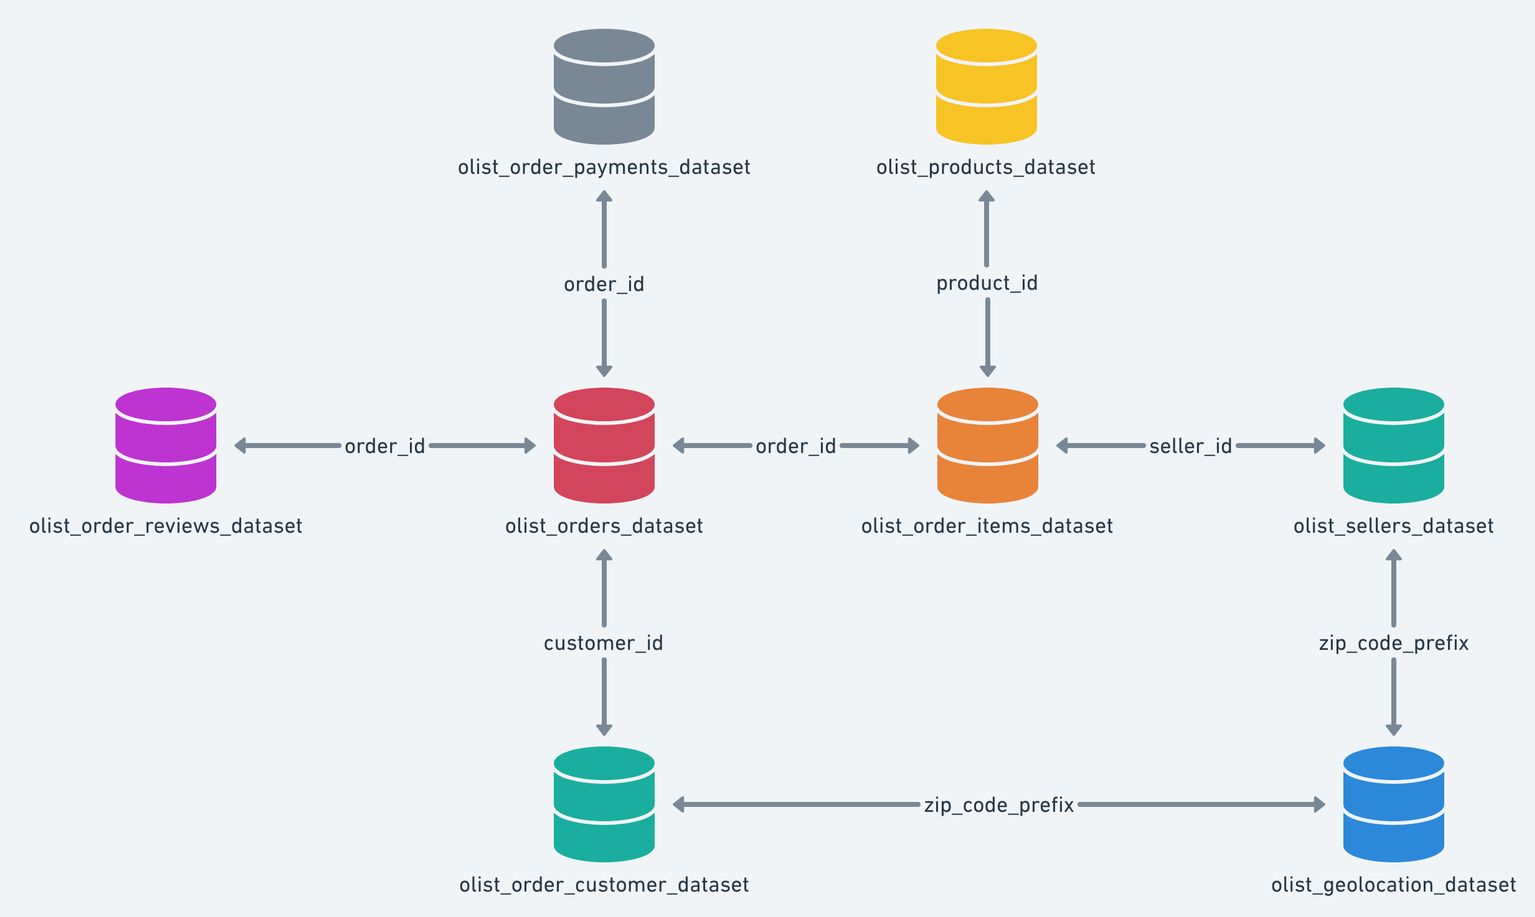

In [ ]:
!pip install gitly

In [ ]:
# Instalando Pandas profiling
!pip install -U pandas-profiling

# Bibliotecas & Upload dos dataframes

In [52]:
import pandas as pd
from gitly.colab.plot import GitlyPlotter
import plotly.express as px

gitly = GitlyPlotter('git') #quando for Lancar no github mudar para git quando for usar no colab manter colab

In [53]:
path_dir = '/content/drive/MyDrive/Colab Notebooks/[POS GRADUACAO]/1 - Fundamentos em Ciências de Dados e Inteligência Artificial/1.3 - Introducao a Ciencia de Dados/Datasets'

df_customers = pd.read_csv( path_dir + '/olist_customers_dataset.csv')
df_geo = pd.read_csv(path_dir + '/olist_geolocation_dataset.csv', encoding='utf8')
df_order_items = pd.read_csv(path_dir + '/olist_order_items_dataset.csv')
df_order_pay = pd.read_csv(path_dir + '/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv(path_dir + '/olist_order_reviews_dataset.csv')
df_order = pd.read_csv(path_dir + '/olist_orders_dataset.csv')
df_products = pd.read_csv(path_dir + '/olist_products_dataset.csv')
df_sellers = pd.read_csv(path_dir + '/olist_sellers_dataset.csv')

In [54]:
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [55]:
df_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [56]:
df_order_pay.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [57]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [58]:
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [59]:
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


# Exploracao de dados

In [60]:
df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [61]:
df_order_pay.describe() #metricas basicas estatisticas

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [62]:
df_order_pay.describe() #Correlacao de linear (Pearson)

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [63]:
df_order_pay.payment_type.unique() #Retorna os valores unicos da variavel payment_type

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [64]:
#https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

from pandas_profiling import ProfileReport
profile = ProfileReport(df_order_pay)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Order

In [65]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


## Trabalhando com Datetime

In [66]:
#Vem em formato objetct (string)
df_order.iloc[0].order_estimated_delivery_date

'2017-10-18 00:00:00'

 Conversao para Datetime

In [67]:
#Transforma para Datetime
pd.to_datetime(df_order.order_estimated_delivery_date,format='%Y-%m-%d')

0       2017-10-18
1       2018-08-13
2       2018-09-04
3       2017-12-15
4       2018-02-26
           ...    
99436   2017-03-28
99437   2018-03-02
99438   2017-09-27
99439   2018-02-15
99440   2018-04-03
Name: order_estimated_delivery_date, Length: 99441, dtype: datetime64[ns]

In [68]:
df_order.order_purchase_timestamp = pd.to_datetime( df_order.order_purchase_timestamp, format='%Y-%m-%d' )
df_order.order_approved_at = pd.to_datetime( df_order.order_approved_at, format='%Y-%m-%d' )
df_order.order_delivered_carrier_date = pd.to_datetime( df_order.order_delivered_carrier_date, format='%Y-%m-%d' )
df_order.order_delivered_customer_date = pd.to_datetime( df_order.order_delivered_customer_date, format='%Y-%m-%d' )
df_order.order_estimated_delivery_date = pd.to_datetime( df_order.order_estimated_delivery_date, format='%Y-%m-%d' )

In [69]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Qual Percentual de Atraso nas entregas

In [70]:
df_order['no_prazo'] = df_order.order_estimated_delivery_date > df_order.order_delivered_customer_date
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True


In [71]:
df_order.no_prazo.value_counts()

True     88649
False    10792
Name: no_prazo, dtype: int64

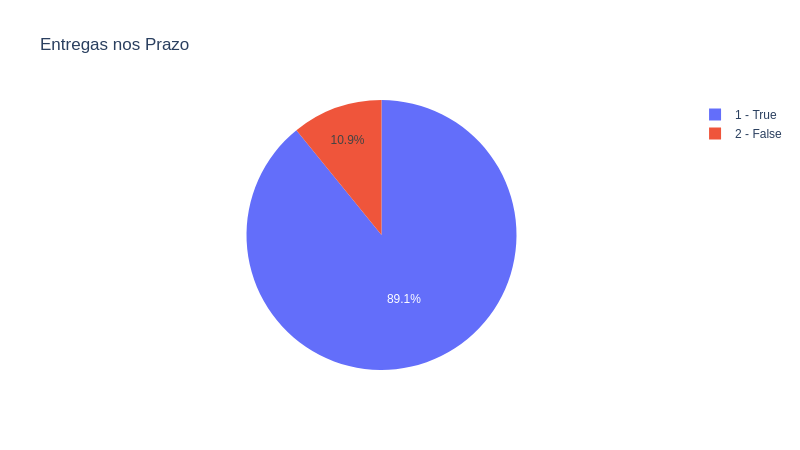

In [102]:
#https://plotly.com/python/pie-charts/


data = df_order.no_prazo.value_counts()

fig = px.pie(data, values='no_prazo', names=['1 - True','2 - False'], title='Entregas nos Prazo')
gitly.show(fig)

### Qual a distribuicao de contas durante a semana

In [73]:
df_order['dia_semana'] = df_order.order_purchase_timestamp.dt.day_name() #funcao dt para datetime
df_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday


In [74]:
df_order.dia_semana.value_counts()

Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: dia_semana, dtype: int64

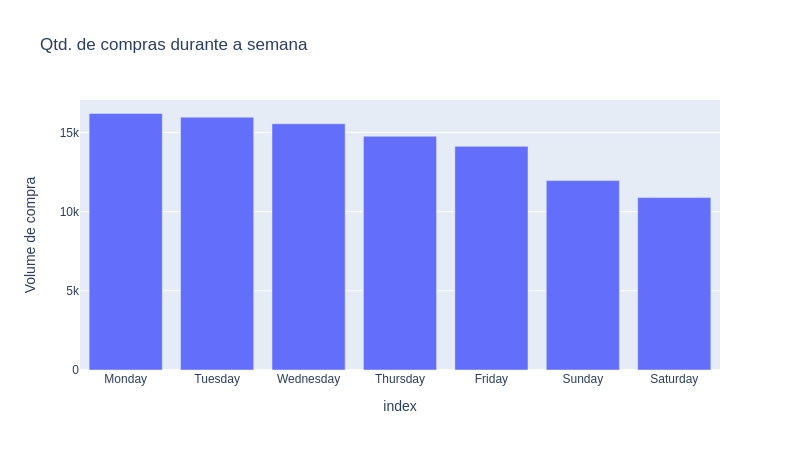

In [75]:
data = df_order.dia_semana.value_counts()
fig = px.bar(data, x=data.index, y='dia_semana', title='Qtd. de compras durante a semana',
                labels={'dia_semana':'Volume de compra', 'x':'Dia'})
gitly.show( fig )

# Quantidade de compras no mes

In [76]:
df_order['dia_mes'] = df_order.order_purchase_timestamp.dt.day
df_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24


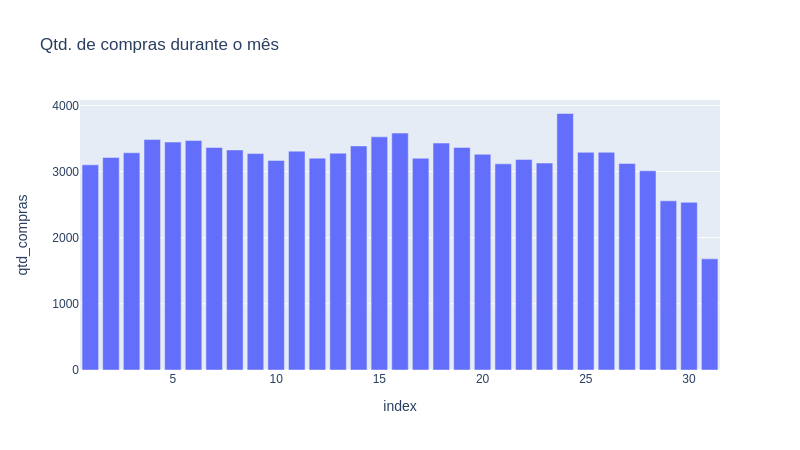

In [77]:
data = df_order.dia_mes.value_counts().rename('qtd_compras').reset_index().sort_values(by='index')

fig = px.bar(data, x='index', y='qtd_compras', title='Qtd. de compras durante o mês',
                labels={'dia_semana':'Volume de compra', 'x':'Dia'})
gitly.show( fig )

## Zona de Pagamento dias 1 5 30 e 31

In [78]:
def verifica_zona_salario ( dia ):
    zona_s = [1,5,15,30,31]

    return dia in zona_s

df_order['zona_salario'] = df_order.dia_mes.apply( verifica_zona_salario )

In [79]:
df_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False


In [80]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()

order_id  customer_id  ...  no_prazo  dia_mes
dia_semana zona_salario                         ...                   
Friday     False            12325        12325  ...     12325    12325
           True              1797         1797  ...      1797     1797
Monday     False            13979        13979  ...     13979    13979
           True              2217         2217  ...      2217     2217
Saturday   False             9779         9779  ...      9779     9779
           True              1108         1108  ...      1108     1108
Sunday     False            10126        10126  ...     10126    10126
           True              1834         1834  ...      1834     1834
Thursday   False            12186        12186  ...     12186    12186
           True              2575         2575  ...      2575     2575
Tuesday    False            13442        13442  ...     13442    13442
           True              2521         2521  ...      2521     2521
Wednesday  False            13320        13320  ...     13320    13320
           True              2232         2232  ...      2232     2232

[14 rows x 10 columns]

In [81]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id']

dia_semana  zona_salario
Friday      False           12325
            True             1797
Monday      False           13979
            True             2217
Saturday    False            9779
            True             1108
Sunday      False           10126
            True             1834
Thursday    False           12186
            True             2575
Tuesday     False           13442
            True             2521
Wednesday   False           13320
            True             2232
Name: order_id, dtype: int64

In [82]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id'].rename('qtd_compras')

dia_semana  zona_salario
Friday      False           12325
            True             1797
Monday      False           13979
            True             2217
Saturday    False            9779
            True             1108
Sunday      False           10126
            True             1834
Thursday    False           12186
            True             2575
Tuesday     False           13442
            True             2521
Wednesday   False           13320
            True             2232
Name: qtd_compras, dtype: int64

In [83]:
df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id'].rename('qtd_compras').reset_index()

,dia_semana,zona_salario,qtd_compras
0,Friday,False,12325
1,Friday,True,1797
2,Monday,False,13979
3,Monday,True,2217
4,Saturday,False,9779
5,Saturday,True,1108
6,Sunday,False,10126
7,Sunday,True,1834
8,Thursday,False,12186
9,Thursday,True,2575


In [84]:
data = df_order.groupby(by=['dia_semana', 'zona_salario']).count()['order_id'].rename('qtd_compras').reset_index()
#data['zona_str'] = data.zona_salario.apply(str.to_string)
data['zona'] = data.zona_salario.astype('str')
data.head().info

<bound method DataFrame.info of   dia_semana  zona_salario  qtd_compras   zona
0     Friday         False        12325  False
1     Friday          True         1797   True
2     Monday         False        13979  False
3     Monday          True         2217   True
4   Saturday         False         9779  False>

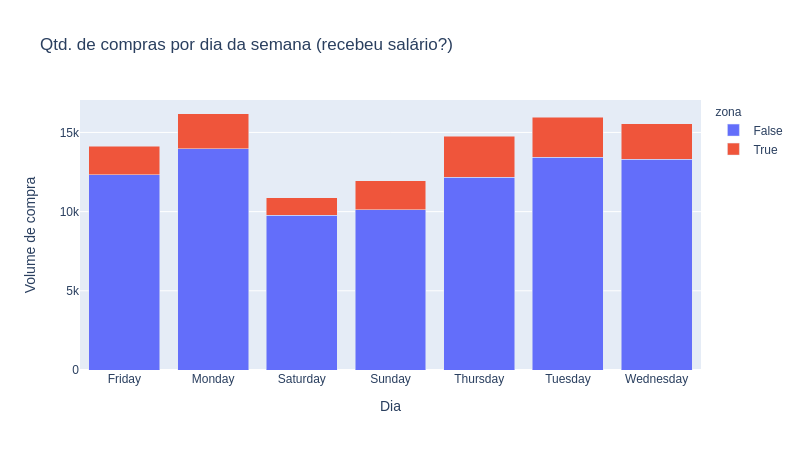

In [85]:
fig = px.bar(data, x='dia_semana', y='qtd_compras', color='zona', title="Qtd. de compras por dia da semana (recebeu salário?)",
             barmode = 'stack', labels={'qtd_compras':'Volume de compra', 'dia_semana':'Dia','zona=False':'Normal'})
gitly.show( fig )

## Qual horario com maior volume de comrpas durante o dia

In [86]:
df_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,no_prazo,dia_semana,dia_mes,zona_salario
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,Monday,2,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,Tuesday,24,False


In [87]:
df_volume_hora = df_order.order_purchase_timestamp.dt.hour.value_counts().rename('volume_hora').reset_index()
df_volume_hora

,index,volume_hora
0,16,6675
1,11,6578
2,14,6569
3,13,6518
4,15,6454
5,21,6217
6,20,6193
7,10,6177
8,17,6150
9,12,5995


In [88]:
df_volume_hora.sort_values(by='index', ascending=True)

,index,volume_hora
16,0,2394
18,1,1170
19,2,510
21,3,272
22,4,206
23,5,188
20,6,502
17,7,1231
15,8,2967
13,9,4785


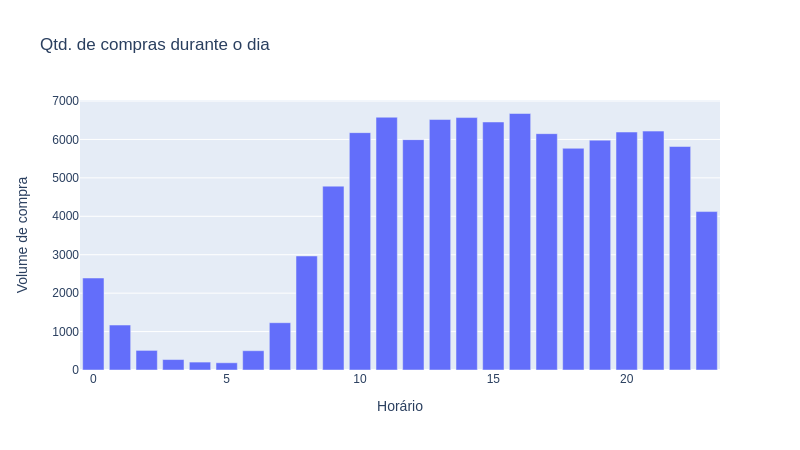

In [89]:
data = df_volume_hora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de compras durante o dia',
                labels={'volume_hora':'Volume de compra', 'index':'Horário'})
gitly.show( fig )

## Entrega durante o dia

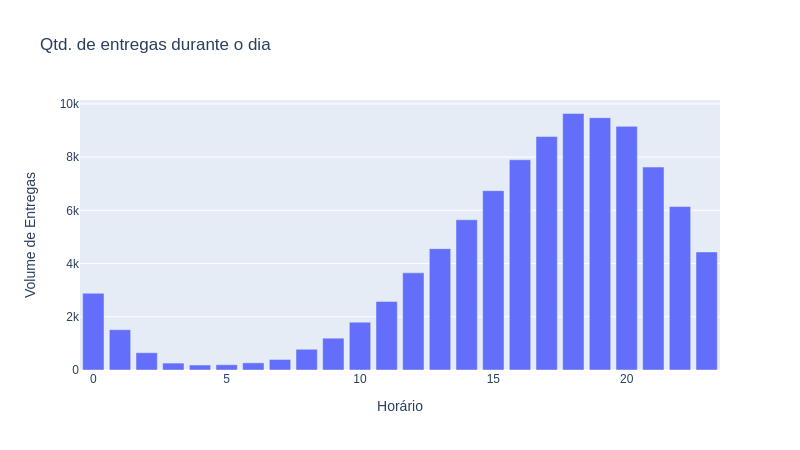

In [90]:
df_volume_hora = df_order.order_delivered_customer_date.dt.hour.value_counts().rename('volume_hora').reset_index()
data = df_volume_hora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de entregas durante o dia',
                labels={'volume_hora':'Volume de Entregas', 'index':'Horário'})
gitly.show( fig )

# Merge

##### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

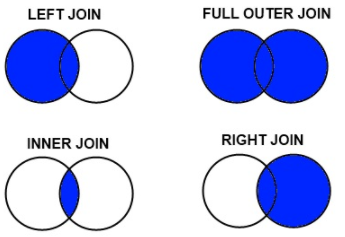

## Categorias Mais vendidas

In [91]:
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [92]:
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [93]:
df_prod_cat = pd.merge(df_order_items[['product_id', 'price','freight_value']], df_products[['product_id','product_category_name']], how='inner', on='product_id')
df_prod_cat.head()

,product_id,price,freight_value,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


In [94]:
df_prod_cat.product_category_name.value_counts().head(7)

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
Name: product_category_name, dtype: int64

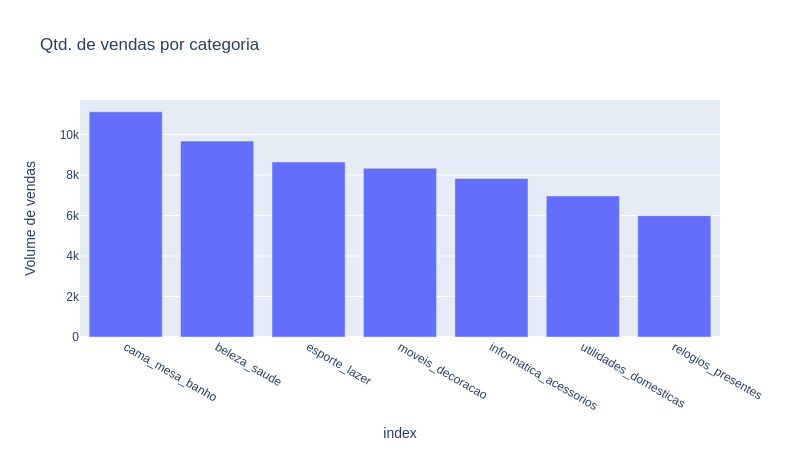

In [95]:
data = df_prod_cat.product_category_name.value_counts().head(7)
fig = px.bar(data, x=data.index, y='product_category_name', title='Qtd. de vendas por categoria',
                labels={'product_category_name':'Volume de vendas', 'x':'Categoria'})
gitly.show( fig )

## Categoria que mais Fatura

In [96]:
df_prod_cat.head()

,product_id,price,freight_value,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,cool_stuff


In [97]:
df_prod_cat.groupby(by='product_category_name').sum().sort_values(by='price', ascending=False).head(7)

,price,freight_value
product_category_name,,
beleza_saude,1258681.34,182566.73
relogios_presentes,1205005.68,100535.93
cama_mesa_banho,1036988.68,204693.04
esporte_lazer,988048.97,168607.51
informatica_acessorios,911954.32,147318.08
moveis_decoracao,729762.49,172749.30
cool_stuff,635290.85,84039.10


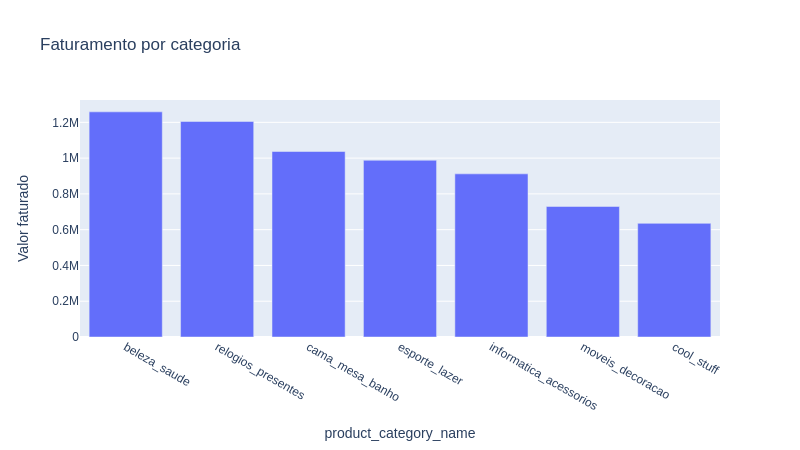

In [98]:
data = df_prod_cat.groupby(by='product_category_name').sum().sort_values(by='price', ascending=False).head(7)
fig = px.bar(data, x=data.index, y='price', title='Faturamento por categoria',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show( fig )

## Categoria Mais Cara

In [99]:
df_prod_cat.groupby(by='product_category_name').mean().sort_values(by='price', ascending=False).head(7)

,price,freight_value
product_category_name,,
pcs,1098.340542,48.454680
portateis_casa_forno_e_cafe,624.285658,36.156053
eletrodomesticos_2,476.124958,44.538571
agro_industria_e_comercio,342.124858,27.564151
instrumentos_musicais,281.616000,27.409544
eletroportateis,280.778468,23.593888
portateis_cozinha_e_preparadores_de_alimentos,264.568667,20.650667


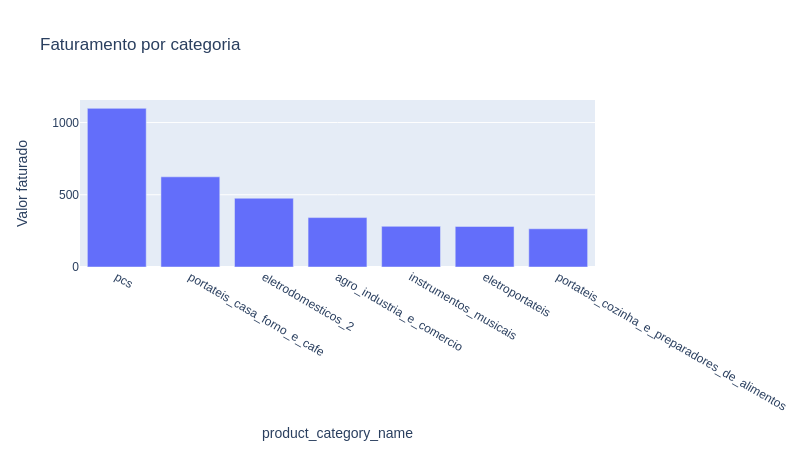

In [100]:
data = df_prod_cat.groupby(by='product_category_name').mean().sort_values(by='price', ascending=False).head(7)
fig = px.bar(data, x=data.index, y='price', title='Faturamento por categoria',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show( fig )